In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aizhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aizhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('labeled.csv')
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [4]:
df['toxic']=df.toxic.apply(int)

In [5]:
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1


In [6]:
df.toxic.value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [7]:
for i in df[df.toxic==1].comment.head(10):
    print(i)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)

Для каких стан является эталоном современная система здравоохранения РФ? Для Зимбабве? Ты тупой? хохлы

УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РАЗВОРУЮТ КАК ВСЕГДА! УЖЕ ТРЕЩИНАМИ ПОШ Л! ТУПЫЕ КИТАЗЫ НЕ МОГУТ НИЧЕГО НОРМАЛЬНО СДЕЛАТЬ!

Ебать тебя разносит, шизик.

Обосрался, сиди обтекай

Зачем ты пишешь хуйню, дегенерат? Поцелуй в губы ! поцелую в засос.



In [8]:
for i in df[df.toxic==0].comment.head(10):
    print(i)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [9]:
train_df,test_df = train_test_split(df,test_size=500)

In [10]:
test_df.shape

(500, 2)

In [13]:
test_df['toxic'].value_counts()

0    359
1    141
Name: toxic, dtype: int64

In [14]:
train_df['toxic'].value_counts()


0    9227
1    4685
Name: toxic, dtype: int64

***Приводим в порядок комменты. Убираем знаки пунктуации, окончания(стемминг) и междометие(стоп слова)***

In [17]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example,language='russian')
tokens_without_punctuation=[i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words('russian')
tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language='russian')
stemmed_tokens=[snowball.stem(i) for i in tokens_without_punctuation_and_stopwords]

In [25]:
print(f'Исходный текст: {sentence_example}')
print('-'*150)
print(f'Токены: {tokens}')
print('-'*150)
print(f'Токены без пунктуаци: {tokens_without_punctuation}')
print('-'*150)
print(f'Токены без пунктуации и стоп слов: {tokens_without_punctuation_and_stopwords}')
print('-'*150)
print(f'Токены стемминг: {stemmed_tokens}')
print('-'*150)

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

------------------------------------------------------------------------------------------------------------------------------------------------------
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
------------------------------------------------------------------------------------------------------------------------------------------------------
Токены без пунктуаци: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-------------------------------------------------------------------------------------------------------------------------------------------

*Напишем функцию для обработки по выше указонной схеме*

In [26]:
snowball = SnowballStemmer(language='russian')
russian_stop_words  = stopwords.words('russian')

def tokenize_sentence(sentence:str, remove_stop_words:bool=True):
    tokens = word_tokenize(sentence, language='russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [27]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

**Пишем векторайзер Tfidf(способ кодировки без embedding-а т.е базовый) для кодировки токенов**

In [28]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,True))

In [29]:
#обучаем векторайзер и получаем фичи 
features = vectorizer.fit_transform(train_df.comment)

In [30]:
model = LogisticRegression(random_state=0)

In [37]:
train_df.head(5)

,comment,toxic
5847,Байкеры уже не те ряяя\n,1
9097,Может под внешними причинами понимают не межви...,0
4958,Молодцы. А у нас на них только бабки пилят или...,0
9428,"Окей, идет читать, что такое Зиверт, и видим, ...",0
10125,"купол у юниора похож на д-5, он болле квадратн...",0


In [32]:
features

<13912x35418 sparse matrix of type '<class 'numpy.float64'>'
	with 218861 stored elements in Compressed Sparse Row format>

In [33]:
model.fit(features,train_df.toxic)

LogisticRegression(random_state=0)

In [34]:
model.predict(features[0])

array([1], dtype=int64)

In [36]:
train_df.iloc[0]

comment    Байкеры уже не те ряяя\n
toxic                             1
Name: 5847, dtype: object

In [49]:
model_pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,True))),
    ('model',LogisticRegression(random_state=0))
]
)

In [50]:
model_pipeline.fit(train_df.comment,train_df.toxic)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000021695FC9940>)),
                ('model', LogisticRegression(random_state=0))])

In [51]:
model_pipeline.predict(['Здравствуй дивный новый мир'])

array([0], dtype=int64)

In [52]:
model_pipeline.predict(['Пошел ты в попу'])

array([1], dtype=int64)

In [53]:
y_predict = model_pipeline.predict(test_df.comment)

In [54]:
precision_score(test_df.toxic,y_predict)

0.9042553191489362

In [55]:
recall_score(test_df.toxic,y_predict)

0.6028368794326241

In [56]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df.toxic, probas_pred=model_pipeline.predict_proba(test_df.comment)[:, 1])


c:\Users\aizhi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


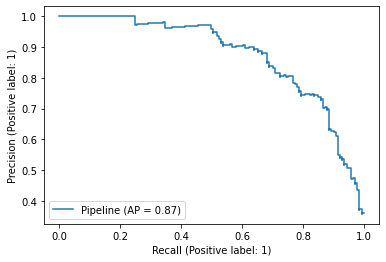

In [59]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df['comment'], y=test_df['toxic'])


recall - это процент удаление плохих комментов

precision - это точность модели

In [60]:
np.where(prec>0.95)

(array([316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
        329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
        342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
        355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
        368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380,
        381, 382, 383, 384, 385, 386, 387, 388, 389, 390], dtype=int64),)

In [62]:
precision_score(y_true=test_df.toxic, y_pred=model_pipeline.predict_proba(test_df.comment)[:, 1] > thresholds[315])


0.9594594594594594

In [63]:
recall_score(y_true=test_df.toxic, y_pred=model_pipeline.predict_proba(test_df.comment)[:, 1] > thresholds[315])


0.5035460992907801

In [64]:
grid_pipeline=Pipeline([
    ('vectorizer',TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,True))),
    ('model',GridSearchCV(
                          LogisticRegression(random_state=0),
                          param_grid={'C':[0.1,1,10]},
                          cv=3,
                          verbose=4
                          ) )
])
# verbose - вывод всех этапов обучения
# C - коэфицент регулиризаций параметр Логистической регресии

In [65]:
grid_pipeline.fit(train_df.comment,train_df.toxic)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.687 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.687 total time=   0.2s
[CV 3/3] END .............................C=0.1;, score=0.683 total time=   1.0s
[CV 1/3] END ...............................C=1;, score=0.835 total time=   0.6s
[CV 2/3] END ...............................C=1;, score=0.838 total time=   0.5s
[CV 3/3] END ...............................C=1;, score=0.838 total time=   0.4s


c:\Users\aizhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............................C=10;, score=0.867 total time=   1.2s


c:\Users\aizhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............................C=10;, score=0.860 total time=   1.0s
[CV 3/3] END ..............................C=10;, score=0.869 total time=   0.7s


c:\Users\aizhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002169D363160>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10]}, verbose=4))])

In [66]:
model_pipeline_C10 = Pipeline([
    ('vectorizer',TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x,True))),
    ('model',LogisticRegression(random_state=0,C=10))
]
)

In [67]:
model_pipeline_C10.fit(train_df.comment,train_df.toxic)

c:\Users\aizhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000021695FC98B0>)),
                ('model', LogisticRegression(C=10, random_state=0))])

In [68]:
prec_c10, rec_c10, thresholds_c10 = precision_recall_curve(y_true=test_df.toxic,\
                                                           probas_pred=model_pipeline_C10.predict_proba(test_df.comment)[:, 1])


In [69]:
np.where(prec_c10>0.95)

(array([351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
        364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
        377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
        390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
        403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
        416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427],
       dtype=int64),)

In [72]:
precision_score(y_true=test_df.toxic,\
                y_pred=model_pipeline_C10.predict_proba(test_df.comment)[:, 1] > thresholds_c10[351])


0.96

In [73]:
recall_score(y_true=test_df.toxic,\
             y_pred=model_pipeline_C10.predict_proba(test_df.comment)[:, 1] > thresholds_c10[351])



0.5106382978723404